In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
#dropping unnamed index column beacuse it just kind of id which have no effect on dataset
df.drop('Unnamed: 0',inplace=True,axis=1)

In [4]:
df.shape

(18249, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


There are no Nan values.

In [6]:
#Converting the date column into date, month and year

df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

In [7]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


### Encoding the data

In [8]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df1=df.apply(label_encoder.fit_transform)

In [9]:
df1.dtypes

Date            int64
AveragePrice    int64
Total Volume    int64
4046            int64
4225            int64
4770            int64
Total Bags      int64
Small Bags      int64
Large Bags      int64
XLarge Bags     int64
type            int32
year            int64
region          int32
Month           int64
Day             int64
dtype: object

<AxesSubplot:xlabel='AveragePrice', ylabel='count'>

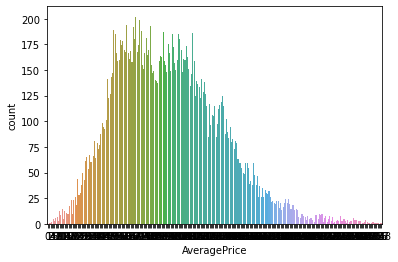

In [10]:
sns.countplot(df1['AveragePrice'])

This is a Regression Problem as the target variable has continous values

### Univariate Analysis

### Distribution Plot for checking data distribution (skewness)

<AxesSubplot:xlabel='Date', ylabel='Density'>

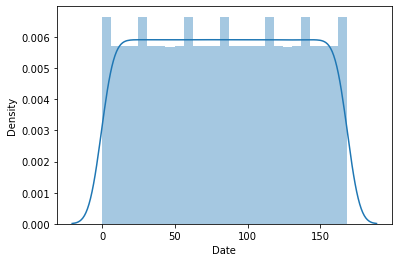

In [11]:
sns.distplot(df1['Date'])

<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

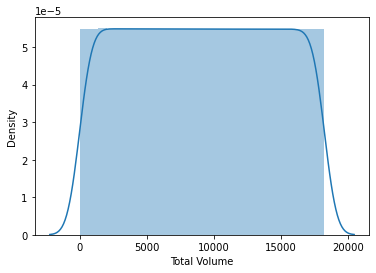

In [12]:
sns.distplot(df1['Total Volume'])

<AxesSubplot:xlabel='4046', ylabel='Density'>

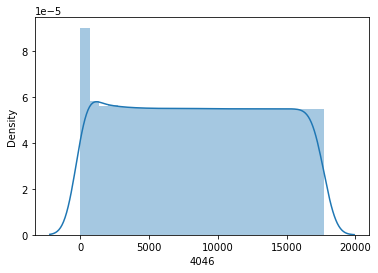

In [13]:
sns.distplot(df1['4046'])

<AxesSubplot:xlabel='4225', ylabel='Density'>

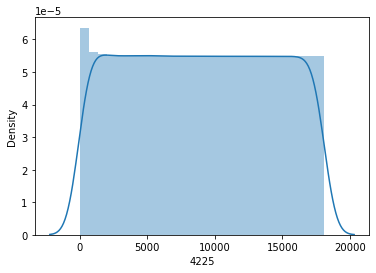

In [14]:
sns.distplot(df1['4225'])

<AxesSubplot:xlabel='4770', ylabel='Density'>

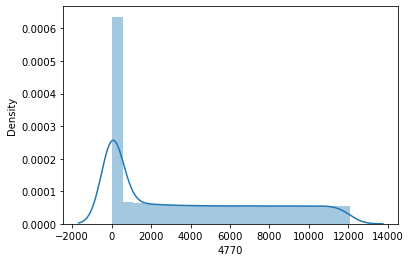

In [15]:
sns.distplot(df1['4770'])

<AxesSubplot:xlabel='Total Bags', ylabel='Density'>

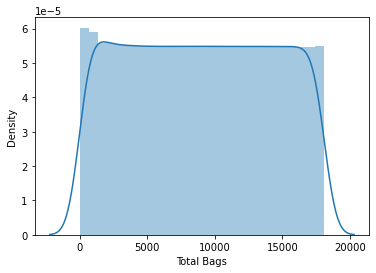

In [16]:
sns.distplot(df1['Total Bags'])

<AxesSubplot:xlabel='Small Bags', ylabel='Density'>

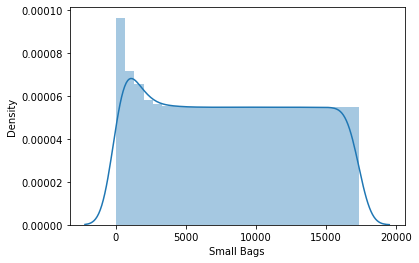

In [17]:
sns.distplot(df1['Small Bags'])

<AxesSubplot:xlabel='Large Bags', ylabel='Density'>

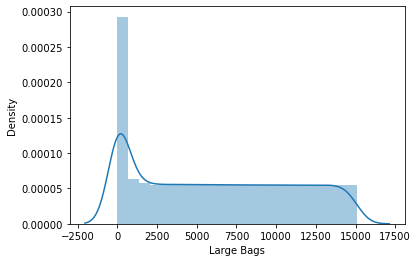

In [18]:
sns.distplot(df1['Large Bags'])

<AxesSubplot:xlabel='XLarge Bags', ylabel='Density'>

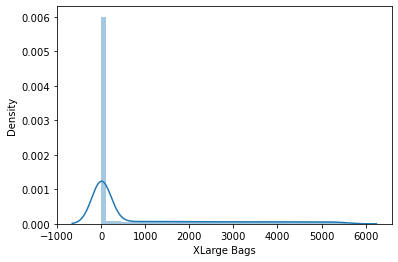

In [19]:
sns.distplot(df1['XLarge Bags'])

<AxesSubplot:xlabel='type', ylabel='Density'>

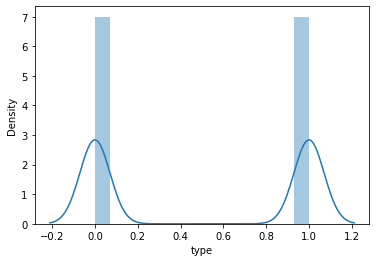

In [20]:
sns.distplot(df1['type'])

<AxesSubplot:xlabel='year', ylabel='Density'>

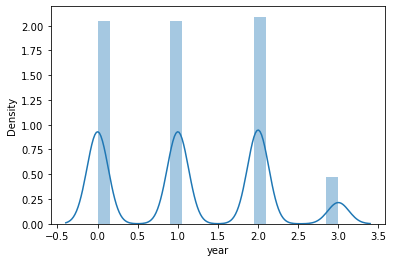

In [21]:
sns.distplot(df1['year'])

<AxesSubplot:xlabel='region', ylabel='Density'>

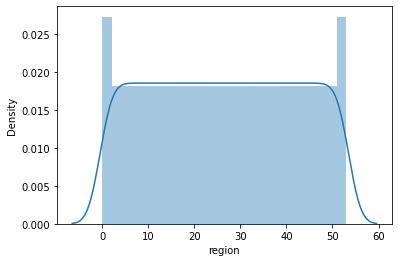

In [22]:
sns.distplot(df1['region'])

<AxesSubplot:xlabel='Day', ylabel='Density'>

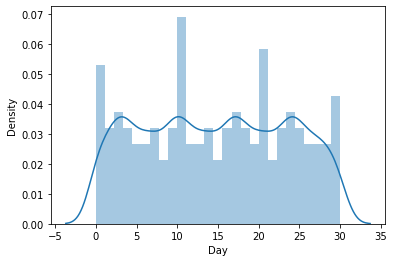

In [23]:
sns.distplot(df1['Day'])

All the variables have skewness and need to be handled

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

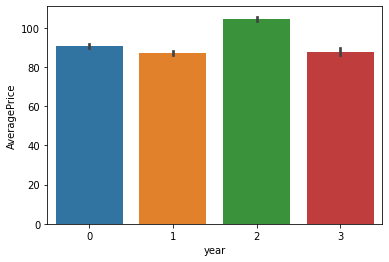

In [24]:
#checking ratio of year and price that which year had max average price
sns.barplot(x = "year" , y = "AveragePrice" ,data=df1 )

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

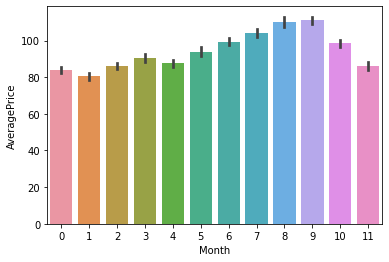

In [25]:
#checking ratio of month and price that which year had max average price
sns.barplot(x = "Month" , y = "AveragePrice" ,data=df1 )

### Bivariate Analysis

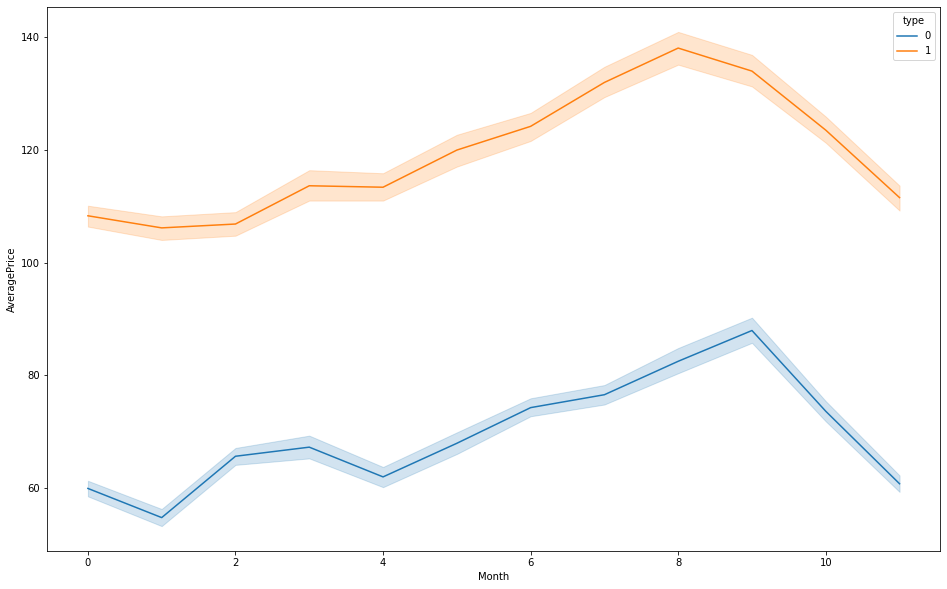

In [26]:
plt.figure(figsize=(16,10))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=df1)
plt.show()

array([[<AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>,
        <AxesSubplot:title={'center':'4225'}>],
       [<AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>],
       [<AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'Day'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

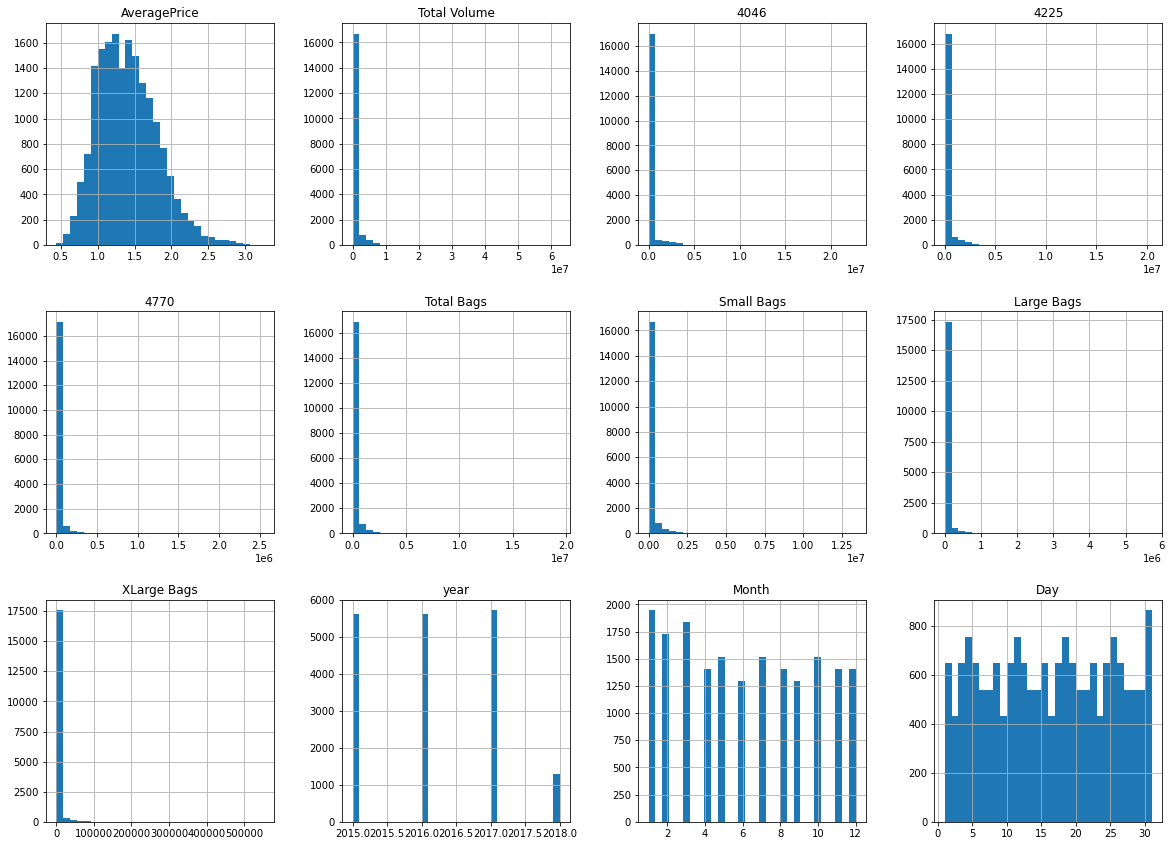

In [27]:
df.hist(figsize=(20,20), grid = True, layout = (4,4), bins = 30)

### Checking for Outliers

Date                AxesSubplot(0.125,0.71587;0.133621x0.16413)
AveragePrice     AxesSubplot(0.285345,0.71587;0.133621x0.16413)
Total Volume      AxesSubplot(0.44569,0.71587;0.133621x0.16413)
4046             AxesSubplot(0.606034,0.71587;0.133621x0.16413)
4225             AxesSubplot(0.766379,0.71587;0.133621x0.16413)
4770               AxesSubplot(0.125,0.518913;0.133621x0.16413)
Total Bags      AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Small Bags       AxesSubplot(0.44569,0.518913;0.133621x0.16413)
Large Bags      AxesSubplot(0.606034,0.518913;0.133621x0.16413)
XLarge Bags     AxesSubplot(0.766379,0.518913;0.133621x0.16413)
type               AxesSubplot(0.125,0.321957;0.133621x0.16413)
year            AxesSubplot(0.285345,0.321957;0.133621x0.16413)
region           AxesSubplot(0.44569,0.321957;0.133621x0.16413)
Month           AxesSubplot(0.606034,0.321957;0.133621x0.16413)
Day             AxesSubplot(0.766379,0.321957;0.133621x0.16413)
dtype: object

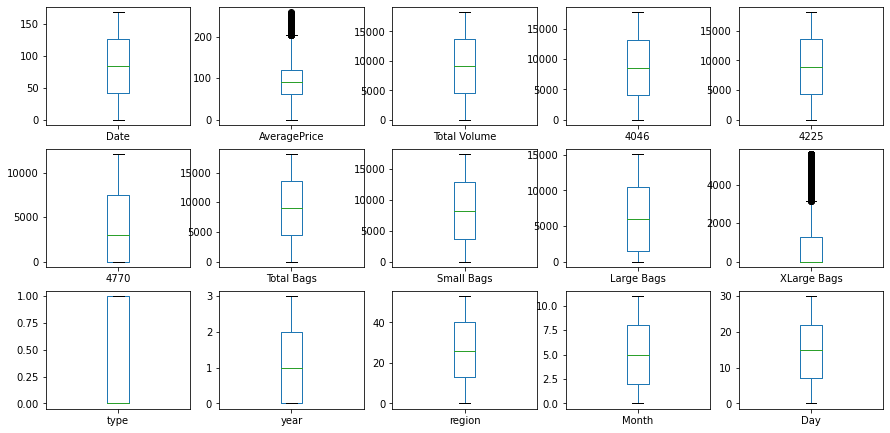

In [28]:
#plotting the boxplot of each column to check the outliers 
df1.plot(kind='box',subplots = True,layout=(4,5),figsize = (15,10))

Average price,XLarge bags have outliers

In [29]:
cor=df1.corr()
cor

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
Date,1.000000,0.145533,0.074852,0.000498,-0.004087,-0.065781,0.198822,0.175062,0.172256,0.159309,-0.000060,0.950274,-0.000101,0.137202,0.033477
AveragePrice,0.145533,1.000000,-0.589341,-0.570148,-0.490201,-0.513770,-0.581311,-0.525067,-0.498835,-0.339222,0.615982,0.093216,-0.011796,0.162413,0.027363
Total Volume,0.074852,-0.589341,1.000000,0.903278,0.940148,0.810884,0.952844,0.928842,0.708302,0.600745,-0.808491,0.085824,0.095988,-0.035493,-0.010503
4046,0.000498,-0.570148,0.903278,1.000000,0.793995,0.741457,0.838443,0.826777,0.647191,0.562309,-0.748193,0.011444,0.184896,-0.034158,-0.008767
4225,-0.004087,-0.490201,0.940148,0.793995,1.000000,0.801623,0.857661,0.838541,0.639056,0.577395,-0.780779,0.006278,0.068547,-0.032171,-0.009521
4770,-0.065781,-0.513770,0.810884,0.741457,0.801623,1.000000,0.757695,0.767877,0.554446,0.624137,-0.748100,-0.055180,0.050078,-0.032137,-0.005098
Total Bags,0.198822,-0.581311,0.952844,0.838443,0.857661,0.757695,1.000000,0.962575,0.758396,0.594852,-0.754928,0.205703,0.098432,-0.025145,-0.006285
Small Bags,0.175062,-0.525067,0.928842,0.826777,0.838541,0.767877,0.962575,1.000000,0.612231,0.590193,-0.757381,0.180780,0.094037,-0.021219,-0.003366
Large Bags,0.172256,-0.498835,0.708302,0.647191,0.639056,0.554446,0.758396,0.612231,1.000000,0.474620,-0.527684,0.180002,0.121728,-0.027568,-0.005700
XLarge Bags,0.159309,-0.339222,0.600745,0.562309,0.577395,0.624137,0.594852,0.590193,0.474620,1.000000,-0.561368,0.160041,0.012659,-0.005383,0.004573


<AxesSubplot:>

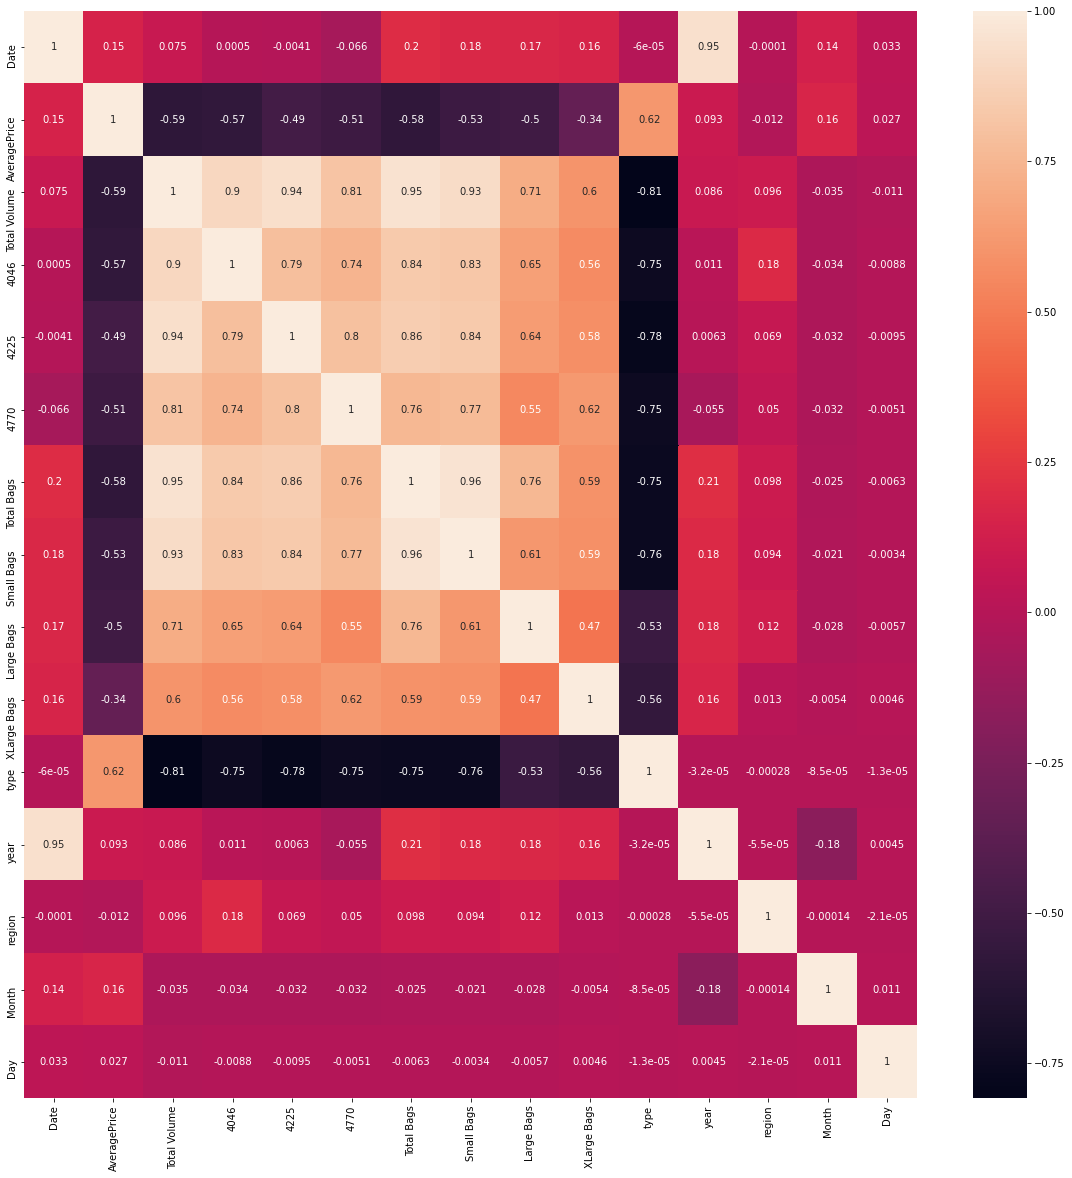

In [30]:
import matplotlib.pyplot as plt
fig, ax_size = plt.subplots(figsize=(20,20))
sns.heatmap(cor,annot=True,ax=ax_size,linecolor='r')

### Removal of Outliers

In [31]:
from scipy.stats import zscore

z=np.abs(zscore(df1))

df2=df1[(z<3).all(axis=1)]

In [32]:
df2.shape

(18118, 15)

In [33]:
df1.shape

(18249, 15)

In [34]:
Loss_percentage=(18249-18118)/18249*100
print(Loss_percentage)

0.7178475532905912


This is less than 8% threshold. So we can consider the new df

### Removing Skewness

In [35]:
df2.skew()

Date            0.009264
AveragePrice    0.400323
Total Volume   -0.009983
4046            0.006429
4225           -0.006789
4770            0.500235
Total Bags     -0.003095
Small Bags      0.037888
Large Bags      0.181088
XLarge Bags     1.599287
type            0.014794
year            0.224198
region          0.006878
Month           0.115642
Day             0.014846
dtype: float64

### Dividing data into dependent and independent variables

In [36]:
x = df2.drop(columns=['AveragePrice','Date'])
y = df2[["AveragePrice"]]
print(x.shape)
print(y.shape)

(18118, 13)
(18118, 1)


### Scaling the data using standard scaler

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(x)
x = pd.DataFrame(x,columns=x.columns)

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30, random_state=1)

In [40]:
#importing module
from sklearn.preprocessing import MinMaxScaler
# creating normalization object 
norm = MinMaxScaler()
# fit data
norm_fit = norm.fit(x_train)
new_xtrain = norm_fit.transform(x_train)
new_xtest = norm_fit.transform(x_test)
# display values
print(new_xtrain)

[[0.63692696 0.60380769 0.73261146 ... 0.32075472 0.72727273 0.56666667]
 [0.27204431 0.21495961 0.28236009 ... 0.83018868 0.72727273 0.33333333]
 [0.84684141 0.90497712 0.64466052 ... 0.45283019 0.18181818 0.56666667]
 ...
 [0.96644001 0.98045308 0.93619137 ... 0.8490566  0.09090909 0.66666667]
 [0.25592235 0.00779617 0.16070935 ... 0.0754717  0.09090909 0.9       ]
 [0.78454705 0.39206824 0.87050439 ... 0.0754717  0.45454545 0.66666667]]


### Model Creation

### Linear Regression Model

In [41]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(new_xtrain,y_train)

LinearRegression()

In [42]:
lr.score(new_xtrain,y_train)

0.5580160107108665

In [43]:
lr.coef_

array([[-113.02524172,   12.28032255,  104.75701875,   -7.08538848,
        -110.9790949 ,   90.10250025,   -3.27984989,    3.60832407,
          36.60235921,   29.06301418,    1.50040308,   22.33385989,
           3.45315264]])

In [44]:
pred_lr=lr.predict(new_xtest)

In [45]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred_lr))

0.5679930081666629


In [46]:
from sklearn.model_selection import cross_val_score
cvscoreslr= cross_val_score(lr,new_xtrain,y_train, scoring = 'r2', cv =5)
cv_lr=cvscoreslr.mean()
cv_lr

0.5562080355006606

### Lasso Regression Model

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(new_xtrain,y_train)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [49]:
ls = Lasso(alpha=0.0001)
ls.fit(new_xtrain,y_train)
ls.score(new_xtrain,y_train)

0.5580159946158479

In [50]:
cv_score_ls=cross_val_score(ls,x,y,cv=5)
cv_mean_ls=cv_score_ls.mean()
cv_mean_ls

0.2235894020875393

In [51]:
pred_ls=ls.predict(new_xtest)

In [52]:
print(r2_score(y_test,pred_ls))

0.5679928690400488


### Random Forest Regressor Model

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['mse'],'max_features':["auto", "sqrt", "log2"]}
rf =RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(new_xtrain,y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [54]:
rf= RandomForestRegressor(criterion="mse", max_features ="auto")
rf.fit(new_xtrain, y_train)
rf.score(new_xtrain, y_train)
pred_rf = rf.predict(new_xtest)

rfs = r2_score(y_test,pred_rf)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,x,y,cv=5)
rfc = rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 Score: 88.01609822949419
Cross Val Score: 22.38616354204181


In [55]:
rf.score(new_xtrain,y_train)

0.9831676223899564

### Difference between R2 score and CV score

Linear Regression: 57-56=1
Lasso Regressor: 57-22=35
Random Forest Regressor: 88-22=66
    
Linear Regression Model has the least difference. So considering the same for Final Model

### Final Model

In [56]:
import pickle
filename = 'avacado_project.pkl'
pickle.dump(rf, open(filename, 'wb'))

In [57]:
Final_Model = pickle.load(open('avacado_project.pkl', 'rb'))
result = Final_Model.score(new_xtest, y_test)
print(result)

0.8801609822949419


In [58]:
conclusion=pd.DataFrame([Final_Model.predict(new_xtest)[:],pred_rf[:]],index=["Predicted","Orginal"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,5426,5427,5428,5429,5430,5431,5432,5433,5434,5435
Predicted,27.02,95.91,135.01,92.31,116.73,86.91,62.9,60.88,150.75,118.57,...,59.32,136.03,138.8,90.02,60.77,67.18,55.73,124.31,68.9,88.95
Orginal,27.02,95.91,135.01,92.31,116.73,86.91,62.9,60.88,150.75,118.57,...,59.32,136.03,138.8,90.02,60.77,67.18,55.73,124.31,68.9,88.95


Predicted value = Actual value

>1 mean=0.8500 se=0.043
>2 mean=0.8350 se=0.035
>3 mean=0.8167 se=0.025
>4 mean=0.8175 se=0.021
>5 mean=0.8100 se=0.017
>6 mean=0.8100 se=0.015
>7 mean=0.8086 se=0.014
>8 mean=0.8100 se=0.013
>9 mean=0.8100 se=0.013
>10 mean=0.8100 se=0.012
>11 mean=0.8064 se=0.012
>12 mean=0.8058 se=0.011
>13 mean=0.8077 se=0.011
>14 mean=0.8050 se=0.011
>15 mean=0.8053 se=0.011


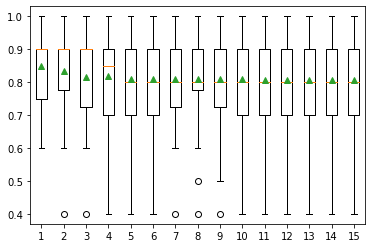

In [60]:
from scipy.stats import sem
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
 
# evaluate a model with a given number of repeats
def evaluate_model(X, y, repeats):
	# prepare the cross-validation procedure
	cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
	# create model
	model = LogisticRegression()
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# create dataset
X, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# configurations to test
repeats = range(1,16)
results = list()
for r in repeats:
	# evaluate using a given number of repeats
	scores = evaluate_model(X, y, r)
	# summarize
	print('>%d mean=%.4f se=%.3f' % (r, mean(scores), sem(scores)))
	# store
	results.append(scores)
# plot the results
pyplot.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
pyplot.show()